In [1]:
# This notebook uses the VGG16 neural network to create features for
# finding similar images. It requires Tensorflow and the Keras application.
# VGG16 was trained in ImageNet and can provide object detection, which can
# be useful with these images and the network's representation of scaled images
# as a vector of 1,000 values provides useful features for distance measurements,
# classifications, and other image tasks. 
#
# James E. Dobson
# James.E.Dobson@Dartmouth.EDU
# https://jeddobson.github.io/

import numpy as np
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy, os, re
import tensorflow as tf
import sklearn

In [ ]:
# download and extract data
!wget 'https://www.dropbox.com/s/7iq7kg623z5f0sd/opencv_data.tgz?dl=0' -O opencv_data.tgz
!tar -zxf opencv_data.tgz > /dev/null 2>&1

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [5]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

Metal device set to: Apple M1 Pro


2023-01-30 10:06:00.886803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-30 10:06:00.887015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
def get_prediction(image_file,display_flag=False):
    img = image.load_img(image_file,color_mode='rgb', target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    
    if display_flag:
        display(img)
    decoded = [x[1:] for x in decode_predictions(features)[0]]
    return decoded

1/1 [==============================] - 0s 18ms/step


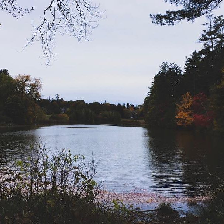

[('lakeside', 0.9231236),
 ('canoe', 0.024718774),
 ('boathouse', 0.015079607),
 ('valley', 0.012122753),
 ('paddle', 0.0036999844)]

In [8]:
get_prediction('train/14719691_657210427789980_5511428924740993024_n.jpg',display_flag=True)

1/1 [==============================] - 0s 18ms/step


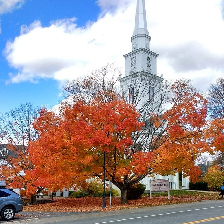

[('mosque', 0.5109419),
 ('church', 0.09945136),
 ('fountain', 0.04838084),
 ('dome', 0.03120523),
 ('palace', 0.019061996)]

In [13]:
get_prediction('train/14717662_219665258446439_2538176967283310592_n.jpg',display_flag=True)

1/1 [==============================] - 0s 17ms/step


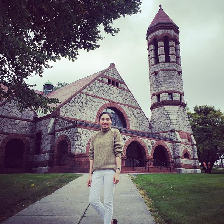

[('church', 0.6061484),
 ('monastery', 0.12132069),
 ('castle', 0.09878656),
 ('bell_cote', 0.056499),
 ('palace', 0.034950793)]

In [16]:
get_prediction('train/14482663_1739187826342894_146245723782905856_n.jpg',display_flag=True)

1/1 [==============================] - 0s 17ms/step


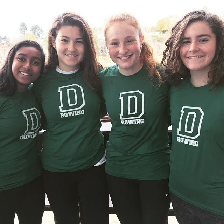

[('sweatshirt', 0.3192335),
 ('knee_pad', 0.19202468),
 ('jersey', 0.106682),
 ('bulletproof_vest', 0.059121966),
 ('wig', 0.046724383)]

In [18]:
get_prediction('train/14566625_1760095214239415_7171580328929132544_n.jpg',display_flag=True)

In [ ]:
dartmouth_instagram = list()
files = glob("data/*.jpg")
for file in files:
    img = image.load_img(file,color_mode='rgb', target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    dartmouth_instagram.append(model.predict(img_array).flatten())

In [ ]:
from sklearn.neighbors import KDTree
kdt = KDTree(dartmouth_instagram, leaf_size=30, metric='euclidean')
neighbors = kdt.query(dartmouth_instagram, k=10, return_distance=False)    

In [ ]:
def display_neighbors(neighboring_images):
    plt.figure(figsize=(15,7), facecolor='white')
    i = 1
    for image in neighboring_images:
        ax = plt.subplot(2, 5, i)
        
        # read and resize image to 200 x 200
        img = cv2.imread(files[image])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (200, 200)) 
        ax.axis('off')
        ax.imshow(img)
        i += 1
    plt.tight_layout()
    plt.show()

In [ ]:
display_neighbors(neighbors[16])

In [ ]:
# calculate similarities with Euclidean distance metric
from sklearn.metrics import euclidean_distances
euclidean_dist_matrix = euclidean_distances(dartmouth_instagram)

In [ ]:
for i in np.argsort(euclidean_dist_matrix[16]):
    print(files[i],euclidean_dist_matrix[16][i])
    img = cv2.imread(files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()